In [185]:
#导入相关库函数
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

In [186]:
#读取数据
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [187]:
#数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [188]:
#各类数据数量
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [189]:
#行列信息
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 6


In [190]:
#处理数据，生成特征数据与标签数据
mapping = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}

X = data.drop(['Id','PetalLengthCm','PetalWidthCm', 'Species'], axis=1).values # 输入特征数据
y = data.Species.replace(mapping).values.reshape(rows,1) # 标签

X = np.hstack(((np.ones((rows,1))), X))# 增加一列作为偏置（正则化）
print(X.shape)
print(y.shape)

(150, 3)
(150, 1)


In [191]:
#为每个输入特征生成随机权重
np.random.seed(0) 
theta = np.random.randn(1,3) 

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798]]


In [192]:
iteration = 100000 #训练次数
learning_rate = 0.003 # 学习率
J = np.zeros(iteration) # 1X10000矩阵

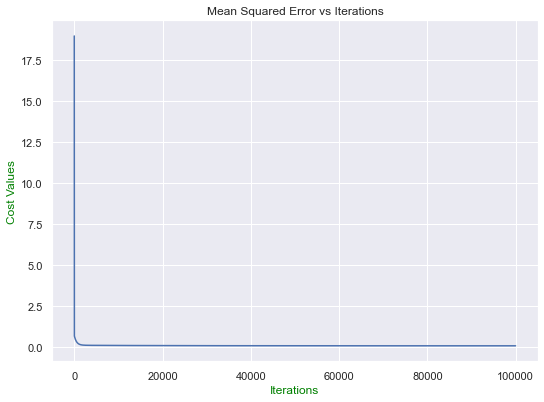

In [193]:
# 训练模型
for i in range(iteration):
    #更新损失函数，使用梯度下降
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))
    
prediction = np.round(np.dot(X, theta.T))
ax = plt.subplot(111)
ax = sns.lineplot(x=np.arange(iteration), y=J)
plt.ylabel("Cost Values", color="Green")
plt.xlabel("Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()
plt.show()

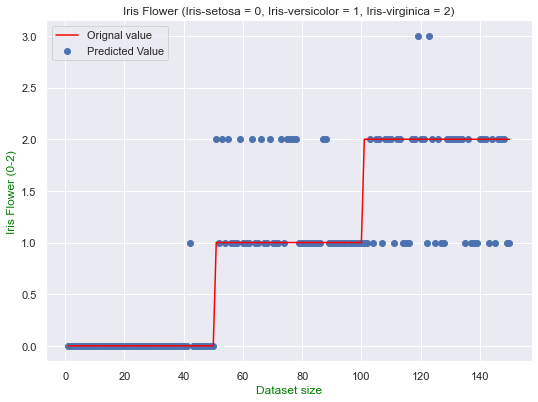

In [194]:
#线性回归结果可视化
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (0-2)", color="Green")
plt.title("Iris Flower (Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2)")

ax.legend()
plt.show()

In [195]:
accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("使用线性回归进行鸢尾花三分类的最终分类准确率为：%s" % (accuracy))

使用线性回归进行鸢尾花三分类的最终分类准确率为：75.33333333333333
